<a href="https://colab.research.google.com/github/CodeHunterOfficial/Practical-Time-Series-Analysis/blob/main/Mikhailova_Regression_and_Monte_Karlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Множественная регрессия

Множественной (multiple regression) называют линейную регрессию, в модели которой число независимых переменных две или более.

Может широко применяться для:
1.	Получения наилучшего линейного уравнения прогноза.
2.	Контроля за смешиванием переменных (факторов).
3.	Оценки вклада определенной совокупности переменных.
4.	Объяснения сложного на вид многомерного комплекса взаимосвязей.
5.	Проведения дисперсионного и ковариационного анализов посредством кодирования уровней независимых переменных.

Уравнение множественной линейной регрессии имеет вид:

Y=b0+b1x1+b2x2+…+bnxn

Как и в простой линейной регрессии, параметры модели bn вычисляются при помощи метода наименьших квадратов.

Отличие между простой и множественной линейной регрессией заключается в том, что вместо линии регрессии в ней используется гиперплоскость.

Преимущество множественной линейной регрессии по сравнению с простой заключается в том, что использование в модели нескольких входных переменных позволяет увеличить долю объясненной дисперсии выходной переменной и таким образом улучшить соответствие модели данным. Т.е. при добавлении в модель каждой новой переменной коэффициент детерминации растет.

Однако в множественной линейной регрессии возникают и проблемы, не характерные для простой модели:
- возможно появление мультиколлинеарности ;
- необходимо выбирать лучшую модель, в которой минимальный набор независимых переменных сможет объяснить наибольшую долю дисперсии зависимой. 

Для построения множественной линейной регрессии откроем новый блокнот и загрузим необходимые библиотеки:

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline

In [ ]:
%run f2forecast.py

Загрузим и изучим структуру датасета.

*Данные синтетические и не отражают реальную ситуацию.*

In [ ]:
df=pd.read_excel("dataset_lr.xlsx")
df.head()

,месяц,год,Средний вес поезда,Ср сут пробег,Ср сут производ-сть,Участковая скорость,Техническая скорость,Следование резервом,Грузооборот,Общий пробег,Вспомогательный пробег,Рабочий парк
0,1,2014,4027.789098,641.960404,1856.454766,43.490513,48.650967,46.806034,1.752266e+07,6468934.502,1394763.702,304.476691
1,2,2014,3990.677837,626.769432,1851.758001,42.398022,48.033059,44.161943,1.705135e+07,6140064.462,1150773.482,328.864210
2,3,2014,3975.466383,612.606054,1803.552082,41.240079,47.262731,43.586246,1.892131e+07,6862058.505,1244170.025,338.423825
3,4,2014,3938.356174,599.205064,1780.019054,40.198248,46.623835,39.842432,1.845964e+07,6647757.413,1119267.113,345.682531
4,5,2014,3914.920860,592.566632,1754.171330,39.482134,45.995732,39.464017,1.832765e+07,6658906.510,1167675.180,337.033450


Целевой величиной для нас является «Рабочий парк».

На всякий случай выполним заполнение нулями ячеек с пропусками.

In [ ]:
df.fillna(0, inplace=True)

Изучим динамику фактических значений нашего ряда.

<AxesSubplot:>

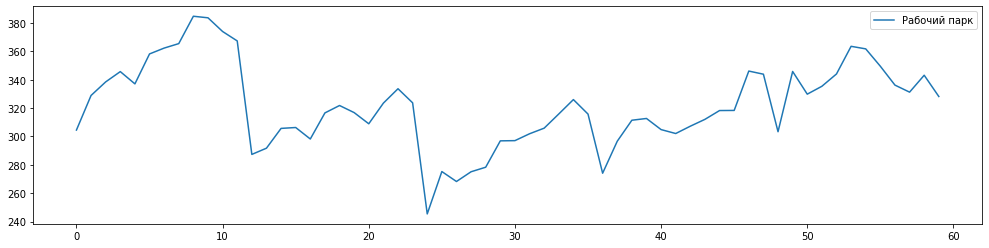

In [ ]:
df[['Рабочий парк']].plot(figsize=(17,4))

Посмотрим, какие параметры в датасете связаны с нашей целевой переменной.

In [ ]:
df.columns

Index(['месяц', 'год', 'Средний вес поезда', 'Ср сут  пробег',
       'Ср сут  производ-сть', 'Участковая скорость', 'Техническая скорость',
       'Следование резервом', 'Грузооборот', 'Общий пробег',
       'Вспомогательный пробег', 'Рабочий парк'],
      dtype='object')

Построим матрицы рассеивания для значащих столбцов.

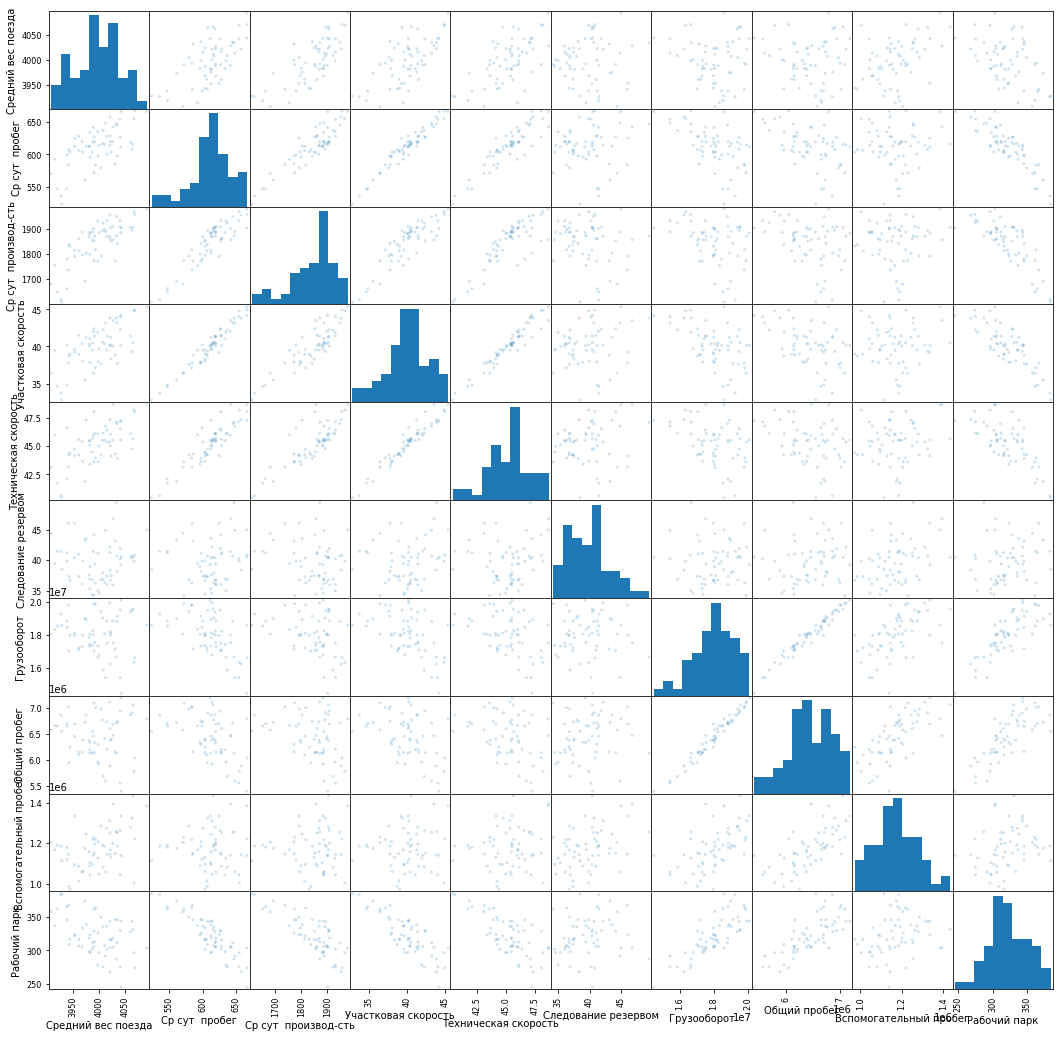

In [ ]:
scatter_matrix(df[['Средний вес поезда', 'Ср сут  пробег',
       'Ср сут  производ-сть', 'Участковая скорость', 'Техническая скорость',
       'Следование резервом', 'Грузооборот', 'Общий пробег',
       'Вспомогательный пробег', 'Рабочий парк']], figsize=(18,18), alpha=0.2)
plt.show()

Посчитаем парные корреляции и отразим их на диаграмме. Передадим функции h_map на датасет и уровень значимости корреляции.

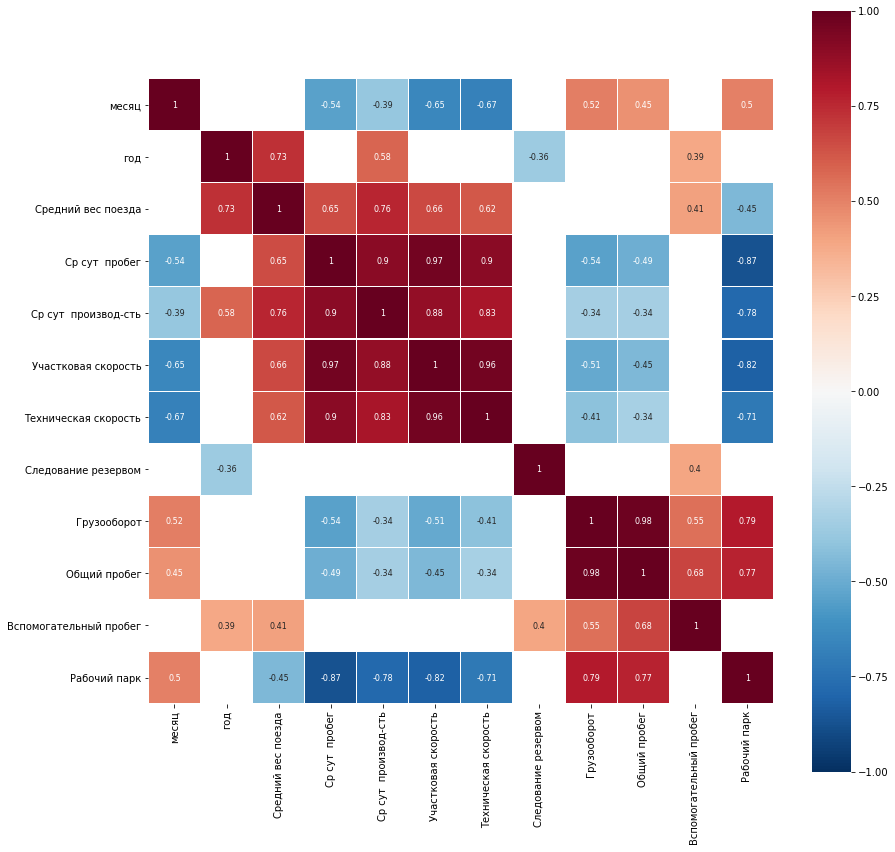

In [ ]:
h_map(df, 0.3)

Разделим переменные на целевую и объясняющие.

In [ ]:
col=['Средний вес поезда', 'Ср сут  пробег',
       'Ср сут  производ-сть', 'Участковая скорость', 'Техническая скорость',
       'Следование резервом', 'Грузооборот', 'Общий пробег',
       'Вспомогательный пробег']
#Разделим на влияющие и целевую переменную
X=df[col]
Y=df['Рабочий парк']

Натренируем модель и изучим результаты. 

                            OLS Regression Results                            
Dep. Variable:           Рабочий парк   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     213.6
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           1.04e-36
Time:                        20:48:15   Log-Likelihood:                -177.27
No. Observations:                  60   AIC:                             374.5
Df Residuals:                      50   BIC:                             395.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -195

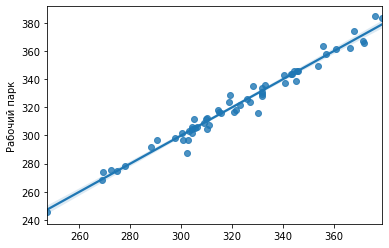

In [ ]:
X=sm.add_constant(X)

reg = sm.OLS(Y, X)
res=reg.fit()
print(res.summary())
r=res.predict(X)
r=np.array(res)
sns.regplot(res.fittedvalues.copy(), Y)
plt.show()

На что обратить внимание:
- R-square получился достаточно значимым. Должен не сильно отличаться от Adj. R-square.
- F-statistic должно быть существенно выше 4.
- Для регрессоров P>|t| должен быть меньше 0,05, а t выходить за интервал [-2,5 : 2,5], это позволяет нам отвергнуть гипотезу о нулевом влиянии регрессора.

В нашем случае модель получилась незначимой, так как удовлетворяются не все условия.

Ниже – расшифровка части важной информации по итогам работы модели. Эти показатели позволяют оценить ее качество и адекватность.

**BIC** - информационный критерий. Похож на AIC, но имеет более высокий штраф для моделей с большим количеством параметров. Чем меньше значение, тем лучше.

**Omnibus** - тест на асимметрию и эксцесс остатков. Мы надеемся увидеть значение, близкое к нулю, которое указывало бы на нормальность. The Prob (Omnibus) выполняет статистический тест, показывающий вероятность того, что остатки нормально распределены. Мы надеемся увидеть здесь что-то близкое к 1. В случае если Omnibus относительно низок, а Prob (Omnibus) относительно высок, остатки в целом нормальны, но не идеальны. Подход с линейной регрессией, вероятно, будет лучше, чем случайное угадывание, но, вероятно, хуже нелинейных подходов.

**Skew** - мера симметрии данных. Мы хотим видеть что-то близкое к нулю, это указывает на то, что остаточное распределение нормально.

**Kurtosis** - это мера «пиковости» или кривизны данных. Более высокие пики приводят к большему куртозу. Большой куртоз можно интерпретировать как более плотную кластеризацию остатков около нуля, что подразумевает лучшую модель с небольшим количеством выбросов (т.е. чем больше, тем лучше).

**Cond. No.** - значения больше 20 вызывают подозрения в мультиколлинеарности. Чаще всего сложно пройти данный тест. Чем меньше, тем лучше.

**R2** - насколько переменные хорошо объясняют разброс оценок. Максимальное значение – 1. Но при значениях более 0,9 надо крайне внимательно проверить на эффект мультиколлинеарности.

**Durbin-Watson** - тест на наличие автокорреляции в остатках. В идеале значение должно стремиться к 2 (минимальное значение – 0, максимальное – 4). Значения меньше 0,8 однозначно указывают на циклические колебания в остатках. Эмпирически считается, что статистика лежит в нормальных пределах, если больше 1,5 и меньше 2,5.

**Jarque-Bera (JB)** - тест на нормальность остатков. Используется на больших наборах данных, более 2000. По своей сути аналогичен Omnibus.

Выполним подбор регрессоров, при которых будут минимальная мультиколлинеарность и высокая точность. 

In [ ]:
res=get_factors(df, Y, col)

Количество комбинаций  512
Результаты перебора в порядке возрастания MSE:
         MSE        r2                                         Переменные
0    71.1899  0.916341  [Грузооборот, Участковая скорость, Следование ...
1    81.3011  0.904459  [Общий пробег, Участковая скорость, Следование...
2   102.7088  0.879302  [Ср сут  производ-сть, Ср сут  пробег, Следова...
3   108.9930  0.871917         [Общий пробег, Участковая скорость, const]
4   118.4978  0.860747          [Грузооборот, Участковая скорость, const]
5   119.4214  0.859662  [Ср сут  пробег, Следование резервом, Вспомога...
6   135.1980  0.841122    [Ср сут  пробег, Вспомогательный пробег, const]
7   139.1183  0.836515  [Ср сут  пробег, Следование резервом, Техничес...
8   155.2335  0.817577       [Ср сут  пробег, Следование резервом, const]
9   169.9866  0.800240  [Участковая скорость, Следование резервом, Всп...
10  178.9255  0.789736  [Ср сут  производ-сть, Участковая скорость, Вс...
11  180.1576  0.788288      [Ср сут  п

Выведем список регрессоров лучшей модели.

In [ ]:
res.loc[0][2]

['Грузооборот', 'Участковая скорость', 'Следование резервом', 'const']

Построим и интерпретируем лучшую модель.

                            OLS Regression Results                            
Dep. Variable:           Рабочий парк   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     204.5
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           3.92e-30
Time:                        20:48:20   Log-Likelihood:                -213.10
No. Observations:                  60   AIC:                             434.2
Df Residuals:                      56   BIC:                             442.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Следование резервом     2.0957    

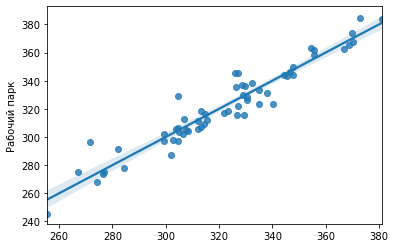

In [ ]:
Y=df['Рабочий парк']
df=sm.add_constant(df)
#укажем пермеенные, которые будем использовать в качестве регрессоров
X=df[['Следование резервом', 'Грузооборот', 'Участковая скорость', 'const']]
reg = sm.OLS(Y, X)
res=reg.fit()
print(res.summary())
sns.regplot(res.fittedvalues.copy(), Y)
plt.show()

Объясняющее уравнение для нашей модели будет выглядеть так:

**Рабочий парк = 2,0957 x Следование резервом + 1,151 x 10-5 x Грузооборот – 6,5204 x Участковая скорость + 292,2525**

# Модель Монте-Карло

Методы Монте-Карло — группа численных методов для изучения случайных процессов. Суть метода заключается в следующем: процесс описывается математической моделью с использованием генератора случайных величин, модель многократно обсчитывается, на основе полученных данных вычисляются вероятностные характеристики рассматриваемого процесса. Например, чтобы узнать методом Монте-Карло, какое в среднем будет расстояние между двумя случайными точками в круге, нужно взять координаты большого числа случайных пар точек в границах заданной окружности, для каждой пары вычислить расстояние, а потом для них посчитать среднее арифметическое.

Методы используются для решения задач в различных областях физики, химии, математики, экономики, оптимизации, теории управления и др.

Название метода происходит от района Монте-Карло, известного своими казино.

Процесс включает следующие этапы:
1.	Определение модели или алгоритма, которые наиболее точно описывают поведение исследуемой системы.
2.	Многократное применение модели с использованием генератора случайных чисел для получения выходных данных модели (моделирование системы). При необходимости моделируют воздействие неопределенности. Модель записывают в форме уравнения, выражающего соотношение между входными и выходными параметрами. Значения, отобранные в качестве входных данных, получают исходя из соответствующих распределений вероятностей, характеризующих неопределенности данных.
3.	С помощью компьютера многократно используют модель (часто до 10000 раз) с различными входными данными и получают выходные данные. Они могут быть обработаны с помощью статистических методов для получения оценок среднего, стандартного отклонения, доверительных интервалов.

Преимущества:
- Метод может быть адаптирован к любому распределению входных данных, включая эмпирические распределения, построенные на основе наблюдений за соответствующими системами.
- Модели относительно просты для работы и могут быть при необходимости расширены.
- Метод позволяет учесть любые воздействия и взаимосвязи, включая такие тонкие, как условные зависимости.
- Для идентификации сильных и слабых влияний может быть применен анализ чувствительности.
- Модели являются понятными, а взаимосвязь между входами и выходами - прозрачной.
- Метод позволяет достичь требуемой точности результатов.
- Программное обеспечение метода доступно и относительно недорого.

Недостатки:
- Точность решений зависит от количества итераций, которые могут быть выполнены (этот недостаток становится менее значимым с увеличением быстродействия компьютера).
- Метод предполагает, что неопределенность данных можно описать известным распределением.
- Большие и сложные модели могут представлять трудности для специалистов по моделированию и затруднять вовлечение заинтересованных сторон.
- Метод не может адекватно моделировать события с очень высокой или очень низкой вероятностью появления, что ограничивает его применение при анализе риска.

## Реализация модели Монте-Карло
Построим модель Монте-Карло по нашему уравнению множественной регрессии. Зададим количество экспериментов:

In [ ]:
size = 1000

Изучим распределение регрессоров на гистограммах.

<AxesSubplot:>

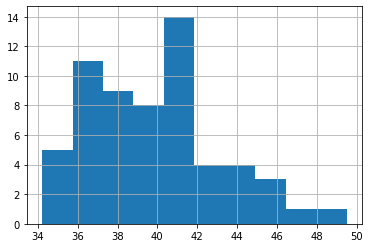

In [ ]:
df['Следование резервом'].hist(bins=10)

<AxesSubplot:>

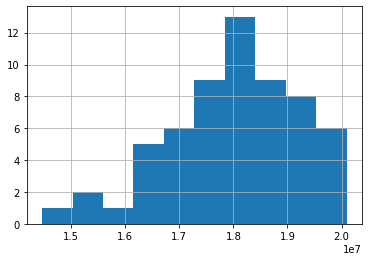

In [ ]:
df['Грузооборот'].hist()

<AxesSubplot:>

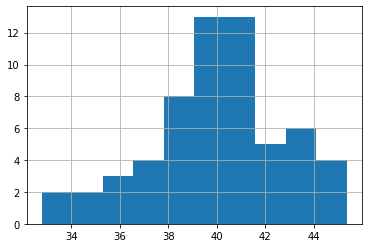

In [ ]:
df['Участковая скорость'].hist()

Кроме этого, нам понадобятся основные статистики данных переменных.

In [ ]:
df[['Следование резервом', 'Грузооборот', 'Участковая скорость']].describe()

,Следование резервом,Грузооборот,Участковая скорость
count,60.000000,6.000000e+01,60.000000
mean,39.775652,1.799936e+07,40.042498
std,3.372028,1.227346e+06,2.761971
min,34.220421,1.446510e+07,32.790784
25%,36.911014,1.728183e+07,38.600381
50%,39.841182,1.804833e+07,40.164294
75%,41.435805,1.886082e+07,41.595073
max,49.481372,2.009155e+07,45.361862


Будем использовать отсюда среднее (хотя чаще всего желательно брать моду), минимальное и максимальное значения.

Мы видим, что «Следование резервом» и «Грузооборот» имеют скорее треугольные распределения, а «Участковая скорость» - нормальное распределение.

Сгенерируем их.

(array([ 40.,  89., 153., 198., 160., 141., 106.,  55.,  36.,  22.]),
 array([34.02382147, 35.61891042, 37.21399936, 38.80908831, 40.40417726,
        41.9992662 , 43.59435515, 45.18944409, 46.78453304, 48.37962199,
        49.97471093]),
 <BarContainer object of 10 artists>)

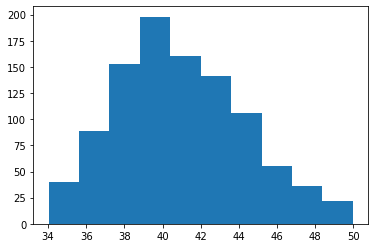

In [ ]:
reserv = np.random.triangular(left = 34, mode = 39, right = 50, size = size)
plt.hist(reserv)

(array([ 37.,  59., 104.,  97., 151., 165., 162., 129.,  70.,  26.]),
 array([14744129.97925505, 15268448.10390548, 15792766.22855592,
        16317084.35320636, 16841402.4778568 , 17365720.60250723,
        17890038.72715767, 18414356.8518081 , 18938674.97645854,
        19462993.10110898, 19987311.22575942]),
 <BarContainer object of 10 artists>)

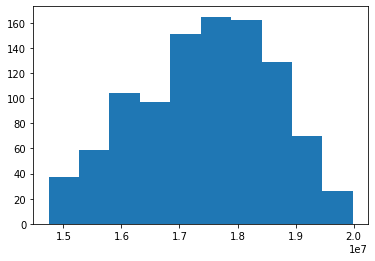

In [ ]:
gruz = np.random.triangular(left = 1.446510e+07, mode = 1.799936e+07, right = 2.009155e+07, size = size)
plt.hist(gruz)

(array([ 26.,  51., 147., 228., 245., 169.,  98.,  25.,   9.,   2.]),
 array([32.43315216, 34.22865002, 36.02414788, 37.81964575, 39.61514361,
        41.41064147, 43.20613933, 45.00163719, 46.79713506, 48.59263292,
        50.38813078]),
 <BarContainer object of 10 artists>)

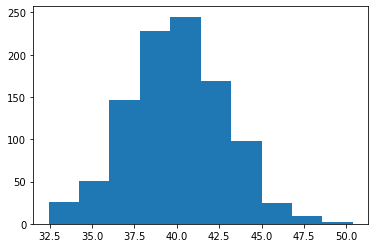

In [ ]:
speed = np.random.normal(loc = 40.0, scale = 2.76, size = size)
plt.hist(speed)

Переменные reserve, gruz, speed хранят таблицы (списки) с результатами 1000 случайных экспериментов. Нам остается только подставить их вместо переменных в нашем уравнении регрессии, чтобы получить в результате количество локомотивов, которое потребовалось.

In [ ]:
lok=2.0957*reserv+1.151e-05*gruz-6.5204*speed+292

Посмотрим распределение случаев по количеству локомотивов.

(array([  2.,   5.,   9.,  13.,  31.,  37.,  55.,  91., 111., 113., 116.,
        107., 114.,  71.,  51.,  37.,  19.,  12.,   3.,   3.]),
 array([241.72910571, 249.13984652, 256.55058733, 263.96132813,
        271.37206894, 278.78280975, 286.19355056, 293.60429136,
        301.01503217, 308.42577298, 315.83651379, 323.24725459,
        330.6579954 , 338.06873621, 345.47947702, 352.89021782,
        360.30095863, 367.71169944, 375.12244025, 382.53318105,
        389.94392186]),
 <BarContainer object of 20 artists>)

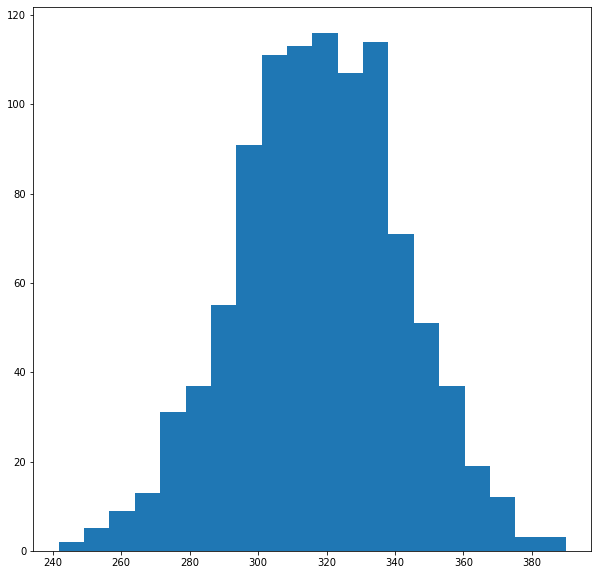

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(lok, bins=20)

Наиболее часто требуется около 325 локомотивов.
Можем провести моделирование, сколько локомотивов нам оптимально содержать.


(array([  3.,   3.,  12.,  19.,  37.,  51.,  71., 114., 107., 116., 113.,
        111.,  91.,  55.,  37.,  31.,  13.,   9.,   5.,   2.]),
 array([-49.94392186, -42.53318105, -35.12244025, -27.71169944,
        -20.30095863, -12.89021782,  -5.47947702,   1.93126379,
          9.3420046 ,  16.75274541,  24.16348621,  31.57422702,
         38.98496783,  46.39570864,  53.80644944,  61.21719025,
         68.62793106,  76.03867187,  83.44941267,  90.86015348,
         98.27089429]),
 <BarContainer object of 20 artists>)

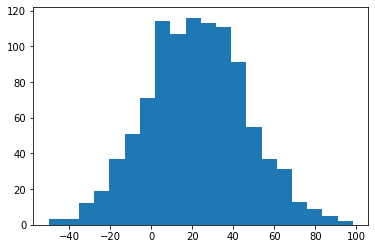

In [ ]:
plt.hist(340-lok, bins=20) 

In [ ]:
np.count_nonzero((340-lok)<0)

183

В этом количестве случаев нам не хватило локомотивов.

(array([  3.,   3.,  12.,  19.,  37.,  51.,  71., 114., 107., 116., 113.,
        111.,  91.,  55.,  37.,  31.,  13.,   9.,   5.,   2.]),
 array([-19.94392186, -12.53318105,  -5.12244025,   2.28830056,
          9.69904137,  17.10978218,  24.52052298,  31.93126379,
         39.3420046 ,  46.75274541,  54.16348621,  61.57422702,
         68.98496783,  76.39570864,  83.80644944,  91.21719025,
         98.62793106, 106.03867187, 113.44941267, 120.86015348,
        128.27089429]),
 <BarContainer object of 20 artists>)

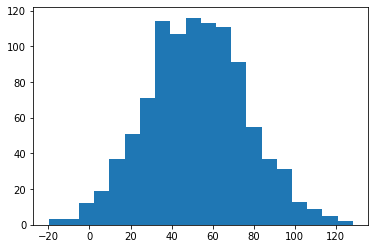

In [ ]:
plt.hist(370-lok, bins=20)

In [ ]:
(370-lok<0).sum()

13

In [ ]:
np.count_nonzero((380-lok)<0)

4

Если мы будем держать 380 локомотивов, то только в 4 случаях из 1000 экспериментов не сможем обеспечить спрос.

# Другие виды распределений

Приведем другие популярные типы распределения случайных величин.

## Равномерное распределение

(array([109., 107.,  96., 106.,  95.,  87., 114., 106.,  80., 100.]),
 array([50.02141136, 52.51708917, 55.01276699, 57.5084448 , 60.00412261,
        62.49980043, 64.99547824, 67.49115605, 69.98683386, 72.48251168,
        74.97818949]),
 <BarContainer object of 10 artists>)

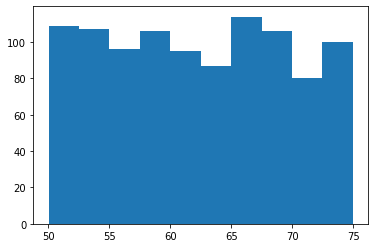

In [ ]:
M1_sample = np.random.uniform(low = 50.0, high = 75.0, size = size)
plt.hist(M1_sample)

## Дискретное распределение

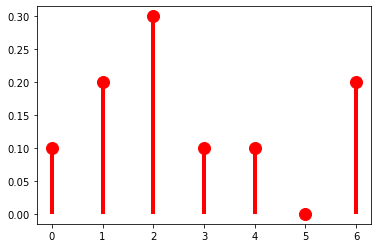

In [ ]:
#инициация распределения
from scipy import stats
xk = np.arange(7)
pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)
custm = stats.rv_discrete(name='custm', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)
plt.show()

(array([ 7., 16., 34.,  8., 16.,  0., 19.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

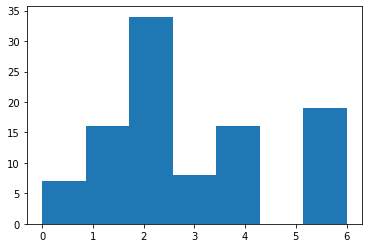

In [ ]:
R = custm.rvs(size=100)
plt.hist(R,bins=7)

## Гамма-распределение

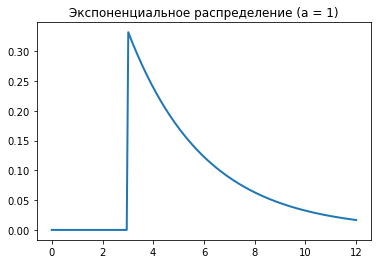

In [ ]:
#инициация распределения
from scipy.stats import gamma
gamma_distribution = gamma(loc = 3, scale = 3, a = 1)
x = np.linspace(0, 12, 200)
_, ax = plt.subplots(1, 1)
ax.plot(x, gamma_distribution.pdf(x), '-', lw=2)
plt.title('Экспоненциальное распределение (a = 1)')
plt.show()

(array([524., 261., 115.,  51.,  29.,  12.,   4.,   2.,   0.,   2.]),
 array([ 3.00235383,  5.27413227,  7.54591071,  9.81768915, 12.08946759,
        14.36124603, 16.63302446, 18.9048029 , 21.17658134, 23.44835978,
        25.72013822]),
 <BarContainer object of 10 artists>)

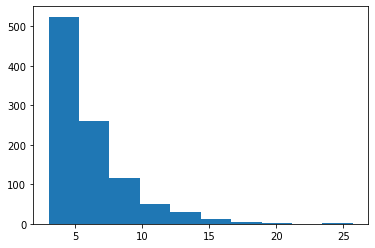

In [ ]:
plt.hist(gamma_distribution.rvs(1000))